# Parte Compuatcional

# Bibliotecas

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal

# Percebendo o Vazamento de Frequências

Considere o sinal $x(t) = sen(2πf_0t)$, com $f_0 = 6 Hz$. Sabemos que o espectro deste sinal, denotado por $X(jω)$, possui somente componentes situadas nas frequências $ω_0 = ±2πf_0 rad/s$. Gostaríamos, então, de poder observar seu comportamento em frequência empregando um computador digital.

# **(a)** Gere a sequência $x[n]$ tomando $N = 64$ amostras de $x(t)$ no intervalo de $0$ a $1$ segundo (ou seja, a frequência de amostragem é igual a $f_s = 64 Hz$). Logo, $x[n] = sen(2π\frac{f_0}{f_s}n)$, onde $n = 0,..., N−1$. Mostre a sequência obtida, utilizando o comando ```stem()```.

In [2]:
def def_xn(f0, fs, N):
  """
  Função que gera uma sequência a partir da frequência da fundamental, a de amostragem e o número de amostras
  Inputs:  f0 --> frequência fundamental
           fs --> frequência de amostragem
           N  --> número de amostras
  Outputs: gráfico de x[n]
  """

  xn = [] #vetor que representa a sequência a ser gerada

  #construindo xn
  for n in range(N):
    xn.append(math.sin(2*math.pi*(f0/fs)*n))
  
  #plotando xn
  plt.title(f"$x[n]$ para $N = {N}$, $f_0 = {f0}$ e $f_s = {fs}$", fontsize = 16)
  plt.grid()
  plt.stem(xn, use_line_collection = True, basefmt = 'C0')
  plt.show()

  return xn

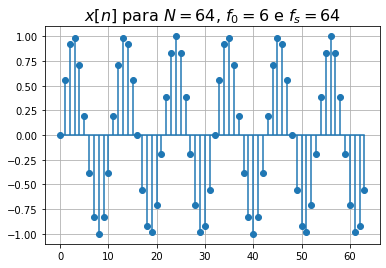

In [3]:
f0 = 6 #frequencia fundamental
fs = 64 #frequencia de amostragem
N = 64 #número de amostras

xn = def_xn(f0, fs, N)

## Discussão item **(a)**

A partir do comandio ```stem()``` podemos observar que a sequência gerada possui o formato de uma senoide, assim como descrito pela equação no enunciado deste item.

# **(b)** Calcule a transformada de Fourier $X(e^{j\Omega})$ associada à sequência $x[n]$. Mostre todos os passos da derivação.

**Dica:** Note que a sequência $x[n]$ é uma versão truncada (ou janelada) da senoide discreta. Ou seja, $x[n] =  sen(2\pi \frac{f_0}{f_s}n)w_N[n]$, onde $w_N[n]$ é uma janela retangular de comprimento $N$, de modo que:

$$w_N [n] =
\begin{cases}
    1,& \text{se } 0 ≤ n ≤ N − 1\\
    0,              & \text{caso contrário}
\end{cases}$$


*Item teórico feito com o pdf entregue juntamente com este notebook.*

# **(c)** Utilizando o comando ```np.fft().ff()``` em Python, compute a DFT da sequência $x[n]$ com $N$ pontos. Apresente, então, o gráfico de $|X(k)|$ em função da frequência $Ω$. Na mesma figura, plote $|X(e^{jΩ})|$. Você pode obter $|X(e^{jΩ})|$ trabalhando com o comando ```scipy.signal.freqz()```. Tendo em vista as propriedades da DFT, analise o espectro obtido, relacionando-o com $X(e^{jΩ})$ e com $X(jω)$ (*i.e.*, com o espectro da senoide analógica).

**Obs.:** Como os sinais em questão são reais, podemos analisar apenas a faixa de frequências de $0$ a $π$ por conta da simetria par do módulo da resposta em frequência.

In [4]:
def modfftc(xn, N):
  """
  Função que retora o módulo da DFT e da Transformada com N pontos
  Inputs:  xn --> sequência obtida no item a
           N  --> número de amostras
  Outputs: transformada e o gráfico correspondente ao módulo
  """

  N2 = int(N/2)

  #cálculo do ômega
  omega = []
  for i in range(N2):
    omega.append(2*math.pi*i/N)
  
  #computando a dft
  dft = np.abs(np.fft.fft(xn))

  #selecionando os valores de 0 a pi
  dft = dft[0:N2]

  #obtendo X(e^{jw})
  w,Xejo = signal.freqz(xn)
  Xejo = np.abs(Xejo)

  #plotando o resultado
  plt.title("$|X(e^{jΩ})|$ e $|X(k)|$ com N pontos", fontsize = 16)
  plt.plot(w, Xejo, color = 'green',label = '$|X(e^{jΩ})|$')
  plt.plot(omega, dft, marker = '.', linestyle = '', markersize = 8, color = 'red', label = '$|X(k)|$')
  plt.grid()
  plt.legend()
  plt.show()

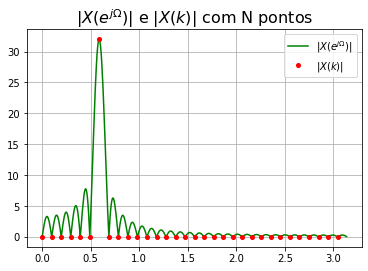

In [5]:
modfftc(xn, N)

## Discussão item **(c)**

No gráfico podemos observar que os valores da DFT representados em vermelho são, com exceção de um único pico em aproximadamente $\Omega = 0.6$, iguais a zero. Temos, também, em verde, o espectro em frequência do módulo da trasformada formado por senoides com um pico também em aproximadamente $\Omega = 0.6$.

O valor de pico observado próximo a $\Omega = 0.6$ se dá quando $\Omega = \omega_0$. Os pontos vermelhos zerados são justificados por $f_0$ e $k$, com base na equação apresentada em **(b)**, serem inteiros e, na amostragem, os senos serão múltiplos pares de $\pi$, por isso serão zerados.

# **(d)** Repita o item **(c)**, mas agora calcule a DFT utilizando $2N$ pontos. O espectro obtido continua sendo uma representação compatível com o esperado para uma senoide pura? Explique o que ocorreu.

In [6]:
 def modfftd(xn, N):
  """
  Função que retora o módulo da DFT e da Transformada com N pontos
  Inputs:  xn --> sequência obtida no item a
           N  --> número de amostras
  Outputs: transformada e o gráfico correspondente ao módulo
  """ 

  omega = []
  for i in range (N): 
    omega.append(2*math.pi*i/(2*N))

  #computando a dft
  dft = np.abs(np.fft.fft(xn, n = int(2*N))) 
  #selecionando os valores de 0 a pi
  dft = dft[0:N]

  #obtendo X(e^{jw})
  w,Xejo = signal.freqz(xn)
  Xejo = np.abs(Xejo)

  #plotando o resultado
  plt.title("$|X(e^{jΩ})|$ e $|X(k)|$ com N pontos", fontsize = 16)
  plt.plot(w, Xejo, color = 'green',label = '$|X(e^{jΩ})|$')
  plt.plot(omega, dft, marker = '.', linestyle = '', markersize = 8, color = 'red', label = '$|X(k)|$')
  plt.grid()
  plt.legend()
  plt.show()

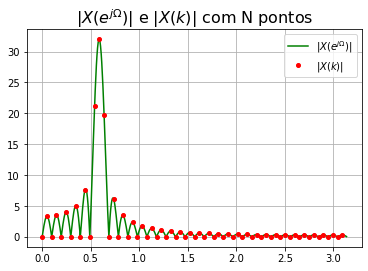

In [7]:
 modfftd(xn, N)

## Discussão item **(d)**
Temos em verde o espectro em frequência do módulo da trasformada formado por senoides com um pico em aproximadamente $\Omega = 0.6$, assim como dito anteriormente. No entanto, observamos que os pontos em vermelho aumentaram de quantidade quando feito a mesma comparação, desta vez é possível notar mais pontos iguais a zero e também diferentes de zero nos picos das senoides; isso ocorre porque dobramos o $N$ inserido.

# **(e)** Repita os itens **(a)** e **(c)** considerando que a frequência fundamental da senoide analógica é $f_0 = 6.5 Hz$. O espectro obtido continua sendo uma representação compatível com o esperado para uma senoide pura? Comente.

## Função utilizada no item **(a)**

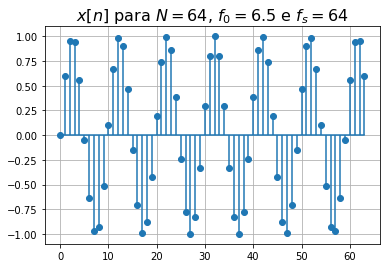

In [10]:
e = def_xn(6.5, 64, 64)

### Discussão da comparação com o item **(a)**

No item **(a)** observamos seis períodos completos, agora observamos que, além de seis períodos inteiros, temos uma certa parcela do próximo. Isso ocorreu porque a frequência fundamental aumentou do item **(a)** para este.

## Função utilizada no item **(c)**

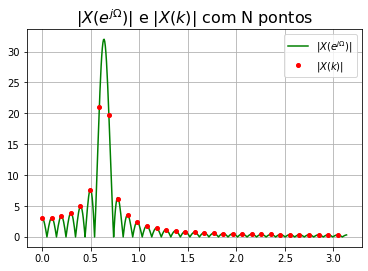

In [11]:
modfftc(e, 64)

### Discussão da comparação com item **(c)**


Observamos pela comparação que os pontos vermelhos deixaram de ter o valor zero, isso ocorre porque $f_0$ e $f_s$ não são mais múltiplos pares de $\pi$. O fenômeno observado no gráfico deste item é conhecido com ovazamento de frequências.